# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [50]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.penalty=penalty
        self.alpha=alpha
        self.weights=None
        self.bias=None
        def fit(self, X, y):
            num_samples, num_features=X.shape
            self.weights=np.zeros(num_features)
            self.bias=0
            for _ in range(self.epochs):
                y_pred=self.predict(X)
                dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / num_samples) * np.sum(y_pred - y)
                
                if self.penalty=="L1":
                    dw += (self.alpha/num_samples)*np.sign(self.weights)
                elif self.penalty=="L2":
                    dw += (2* self.alpha/num_samples)*self.weights
                    
                self.weights -= self.learning_rate*dw
                self.bias -= self.learning_rate*db
                
        def predict(self, X):
            return np.dot(X, self.weights)+ self.bias

# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


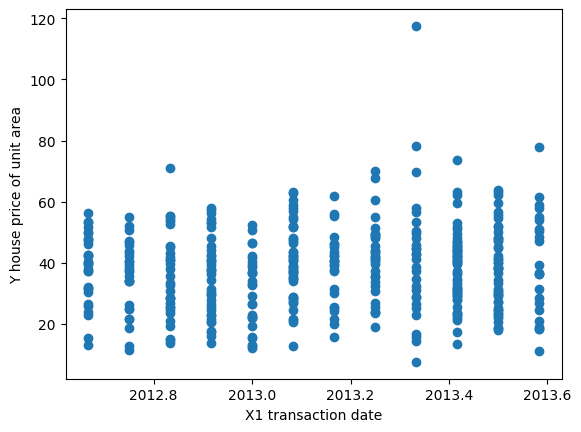

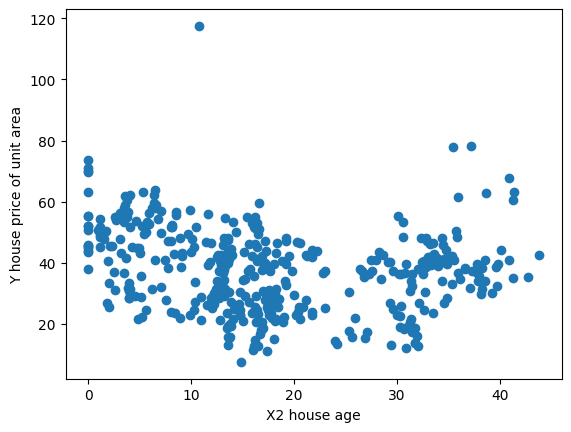

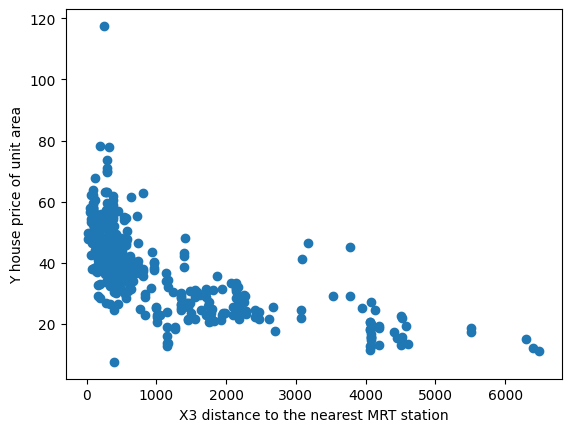

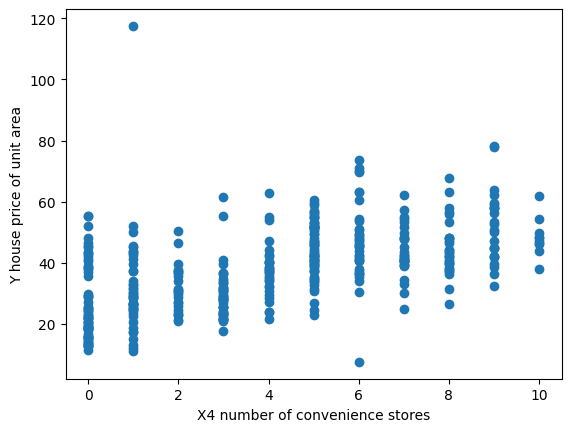

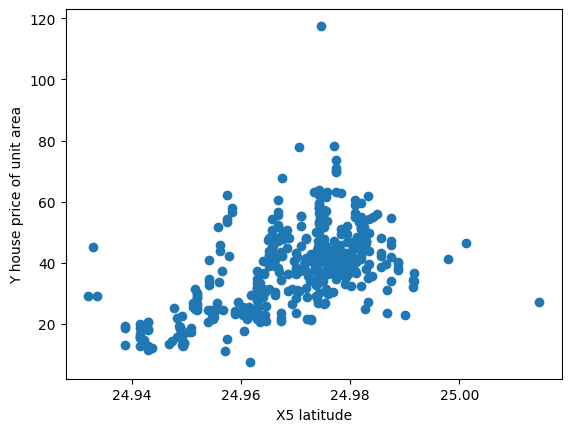

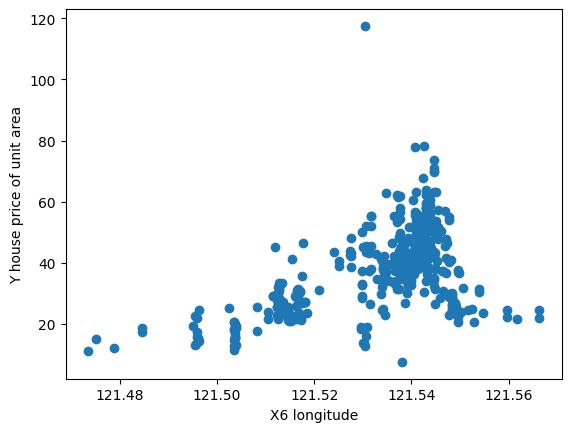

Lasso Regression - MSE: 2.340632952623022


In [51]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.linear_model import Ridge

# Create a Ridge regression object
ridge = Ridge(alpha=0.5)  # You can adjust the value of alpha

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge.predict(X_test)


#read dataset using pandas

data=pd.read_csv("/content/Real estate.csv")
print(data.isnull().sum())

#plotting
columns_to_plot = data.columns[1:-1]
target_column = data.columns[-1]

for column in columns_to_plot:
    plt.scatter(data[column], data[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()
    
#deleting unwanted columns
data=data.drop(columns=["No"])

#split dataset into train and test data
X=data.iloc[:, :-1].values
y=data.iloc[:, :-1].values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

#using MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import Lasso

# Create a Lasso regression object
lasso = Lasso(alpha=0.5)  # You can adjust the value of alpha

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso.predict(X_test)

# Calculate the cost function
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression - MSE:", mse_lasso)


# #models and fit the training data
# lr=LinearRegression()
# lr.fit(X_train, y_train)
# y_pred_lr=lr.predict(X_test)
# lasso=lasso(alpha=0.1)
# lasso.fit(X_train, y_train)
# y_pred_lasso=lasso.predict(X_test)

# ridge=ridge(alpha=0.1)
# ridge.fit(X_train, y_train)
# y_pred_ridge=ridge.predict(X_test)

# #mse and R2 score
# mse_lr=mean_squared_error(y_test, y_pred_lr)
# r2_lr=r2_score(y_test, y_pred_lr)
# print("Linear Regression - MSE:", mse_lr, "R2:", r2_lr)
# mse_lasso=mean_squared_error(y_test, y_pred_lasso)
# r2_lasso=r2_score(y_test, y_pred_lasso)
# print("Lasso Regression - MSE:", mse_lasso, "R2:", r2_lasso)
# mse_ridge=mean_squared_error(y_test, y_pred_ridge)
# r2_ridge=r2_score(y_test, y_pred_ridge)
# print("Ridge Regression - MSE:", mse_ridge, "R2:", r2_ridge)

# #sklearn.linear_model
# lr_sk=sklearn.linear_model.LinearRegression()
# lr_sk.fit(X_train, y_train)
# y_pred_lr_sk=lr_sk.predict(X_test)
# mse_lr_sk=mean_squared_error(y_test, y_pred_lr_sk)
# r2_lr_sk=r2_score(y_test, y_pred_lr_sk)
# print("sklearn Linear Regression - MSE:", mse_lr_sk, "R2:", r2_lr_sk)
# lasso_sk=sklearn.linear_model.Lasso(alpha=0.1)
# lasso_sk.fit(X_train, y_train)
# y_pred_lasso_sk=lasso_sk.predict(X_test)

In [52]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

class lasso:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model = None
    
    def fit(self, X, y):
        self.model = Lasso(alpha=self.alpha)
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def cost_function(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse + self.alpha * np.sum(np.abs(self.model.coef_))

#ridge function
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

class ridge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model = None
    
    def fit(self, X, y):
        self.model = Ridge(alpha=self.alpha)
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def cost_function(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse + self.alpha * np.sum(np.square(self.model.coef_))


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
#load and seperate x &y
data=load_breast_cancer()
X=data.data
y=data.target
#ormalize
scaler=MinMaxScaler()
X_normalized=scaler.fit_transform(X)
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X_normalized, y, test_size=0.2, random_state=42)

5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [54]:
def sigmoid(z):
   return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights)+ self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)


            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self, X):
        z=np.dot(X, self.weights)+self.bias
        y_pred=sigmoid(z)
        y_pred_class=np.where(y_pred>=0.5, 1, 0)
      #Write the predict function
    
        return y_pred_class.flatten()

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [55]:
lr=LogisticRegression(learning_rate=0.01, epochs=1000)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
#compare
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
lr_sk=SklearnLogisticRegression()
lr_sk.fit(X_train, y_train)
y_pred_lr_sk=lr_sk.predict(X_test)
#accuracy_score
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy (Custom):", accuracy_lr)

accuracy_lr_sk=accuracy_score(y_test, y_pred_lr_sk)
print("Logistic Regression Accuracy (Custom):", accuracy_lr_sk)

Logistic Regression Accuracy (Custom): 0.9122807017543859
Logistic Regression Accuracy (Custom): 0.9824561403508771


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [56]:
# Print classification_report
classification_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report (Custom):\n", classification_report_lr)

classification_report_lr_sk = classification_report(y_test, y_pred_lr_sk)
print("Classification Report (Sklearn):\n", classification_report_lr_sk)
# Print confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Custom):\n", confusion_matrix_lr)

confusion_matrix_lr_sk = confusion_matrix(y_test, y_pred_lr_sk)
print("Confusion Matrix (Sklearn):\n", confusion_matrix_lr_sk)

# Print roc_auc_score
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("ROC AUC Score (Custom):", roc_auc_lr)

roc_auc_lr_sk = roc_auc_score(y_test, y_pred_lr_sk)
print("ROC AUC Score (Sklearn):", roc_auc_lr_sk)

Classification Report (Custom):
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        43
           1       0.88      1.00      0.93        71

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Classification Report (Sklearn):
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix (Custom):
 [[33 10]
 [ 0 71]]
Confusion Matrix (Sklearn):
 [[41  2]
 [ 0 71]]
ROC AUC Score (Custom): 0.8837209302325582
ROC AUC Score (Sklearn): 0.9767441860465117


# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [57]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
#load dataset
data=pd.read_csv("/content/glass.csv")
#extract X and Y
X=data.iloc[:, 1:-1]
y=data.iloc[:, -1]
#splitting
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)
y_test.shape

(54,)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [59]:

class KNN:
    def __init__(self, k):
        self.k = k

    

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.subtract((x1 - x2) ** 2))

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            y_pred.append(most_common[0][0])
            return np.array(y_pred)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        knn = KNN(k=3)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)




In [60]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)


accuracy_knn=accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
#compare with sklearn KNN model
knn_sk=KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train, y_train)
y_pred_knn_sk=knn_sk.predict(X_test)
accuracy_knn_sk=accuracy_score(y_test, y_pred_knn_sk)
print("sklearn KNN Accuracy:", accuracy_knn_sk)

KNN Accuracy: 0.6296296296296297
sklearn KNN Accuracy: 0.7037037037037037


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

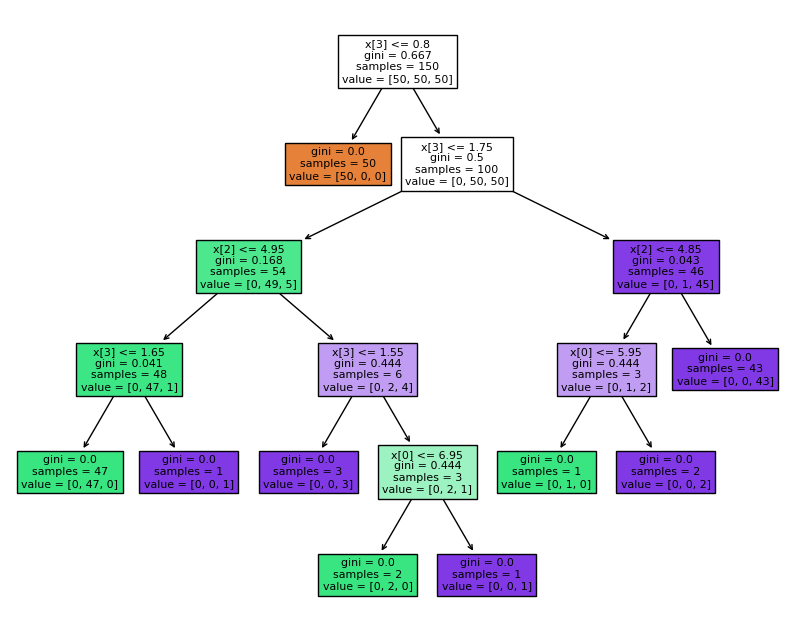

Decision Tree Accuracy (Max Depth= 5 ): 0.6851851851851852
Decision Tree Accuracy (Max Depth= 6 ): 0.7037037037037037
Decision Tree Accuracy (Max Depth= 7 ): 0.7037037037037037
Decision Tree Accuracy (Max Depth= 8 ): 0.7037037037037037
Decision Tree Accuracy (Max Depth= 9 ): 0.7407407407407407
Decision Tree Accuracy (Max Depth= 10 ): 0.7037037037037037


In [62]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True)
plt.show()

#implement decision tree
depths=range(5, 11)
accuracies_dt=[]
for depth in depths:
    dt=DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred_dt=dt.predict(X_test)
    accuracy_dt=accuracy_score(y_test, y_pred_dt)
    accuracies_dt.append(accuracy_dt)
    print("Decision Tree Accuracy (Max Depth=", depth, "):", accuracy_dt)
    
    
#plot decision tree
